In [1]:
import PIL
from PIL import Image

In [2]:
from IPython.display import Image as displayimage

In [3]:
import numpy as np
import tensorflow as tf

imagePath = 'pad_thai_demo.jpg'
modelFullPath = 'output_graph.pb'
labelsFullPath = 'output_labels.txt'


def create_graph():
    """Creates a graph from saved GraphDef file and returns a saver."""
    # Creates graph from saved graph_def.pb.
    with tf.gfile.FastGFile(modelFullPath, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')


def run_inference_on_image(imagePath):
    answer = None
    #displayimage(imagePath)

    if not tf.gfile.Exists(imagePath):
        tf.logging.fatal('File does not exist %s', imagePath)
        return answer

    image_data = tf.gfile.FastGFile(imagePath, 'rb').read()

    # Creates graph from saved GraphDef.
    create_graph()

    with tf.Session() as sess:

        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
        predictions = sess.run(softmax_tensor,
                               {'DecodeJpeg/contents:0': image_data})
        predictions = np.squeeze(predictions)

        top_k = predictions.argsort()[-5:][::-1]  # Getting top 5 predictions
        f = open(labelsFullPath, 'rb')
        lines = f.readlines()
        labels = [str(w).replace("\n", "") for w in lines]
        for node_id in top_k:
            human_string = labels[node_id]
            score = predictions[node_id]
            print('%s (score = %.5f)' % (human_string, score))

        answer = labels[top_k[0]]
        #displayimage(imagePath)
        return answer,top_k
    
def inspectimage(imagePath):
    displayimage(imagePath)
    run_inference_on_image(imagePath)

In [2]:
f = open(labelsFullPath, 'rb')
lines = f.readlines()
labels = [str(w).replace("\n", "") for w in lines]

In [8]:
create_graph()

In [10]:
def classifyimage(imagePath):
    image_data = tf.gfile.FastGFile(imagePath, 'rb').read()
    with tf.Session() as sess:

        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
        predictions = sess.run(softmax_tensor,
                               {'DecodeJpeg/contents:0': image_data})
        predictions = np.squeeze(predictions)

        top_k = predictions.argsort()[-5:][::-1]  # Getting top 5 predictions
        f = open(labelsFullPath, 'rb')
        lines = f.readlines()
        labels = [str(w).replace("\n", "") for w in lines]
#         for node_id in top_k:
#             human_string = labels[node_id]
#             score = predictions[node_id]
#             print('%s (score = %.5f)' % (human_string, score))

        answer = labels[top_k[0]]
        #displayimage(imagePath)
        return answer,top_k

In [12]:
answer,topk=classifyimage('spaghetti_demo.jpg')

In [20]:
label2id[labels[topk[1]]]

80

In [32]:
label2id

{'apple pie': 11,
 'baby back ribs': 86,
 'baklava': 42,
 'beef carpaccio': 35,
 'beef tartare': 29,
 'beet salad': 57,
 'beignets': 22,
 'bibimbap': 21,
 'bread pudding': 69,
 'breakfast burrito': 58,
 'bruschetta': 70,
 'caesar salad': 26,
 'cannoli': 16,
 'caprese salad': 82,
 'carrot cake': 44,
 'ceviche': 67,
 'cheese plate': 66,
 'cheesecake': 92,
 'chicken curry': 14,
 'chicken quesadilla': 4,
 'chicken wings': 91,
 'chocolate cake': 18,
 'chocolate mousse': 24,
 'churros': 2,
 'clam chowder': 54,
 'club sandwich': 32,
 'crab cakes': 59,
 'creme brulee': 27,
 'croque madame': 61,
 'cup cakes': 13,
 'deviled eggs': 56,
 'donuts': 60,
 'dumplings': 78,
 'edamame': 43,
 'eggs benedict': 9,
 'escargots': 37,
 'falafel': 30,
 'filet mignon': 75,
 'fish and chips': 81,
 'foie gras': 55,
 'french fries': 73,
 'french onion soup': 72,
 'french toast': 84,
 'fried calamari': 48,
 'fried rice': 39,
 'frozen yogurt': 3,
 'garlic bread': 34,
 'gnocchi': 33,
 'greek salad': 63,
 'grilled che

In [19]:
label2id={}
labelbuffer=0
for label in labels:
    label2id[label]=labelbuffer
    labelbuffer+=1
    

In [3]:
img = Image.open('spaghetti_demo.jpg')

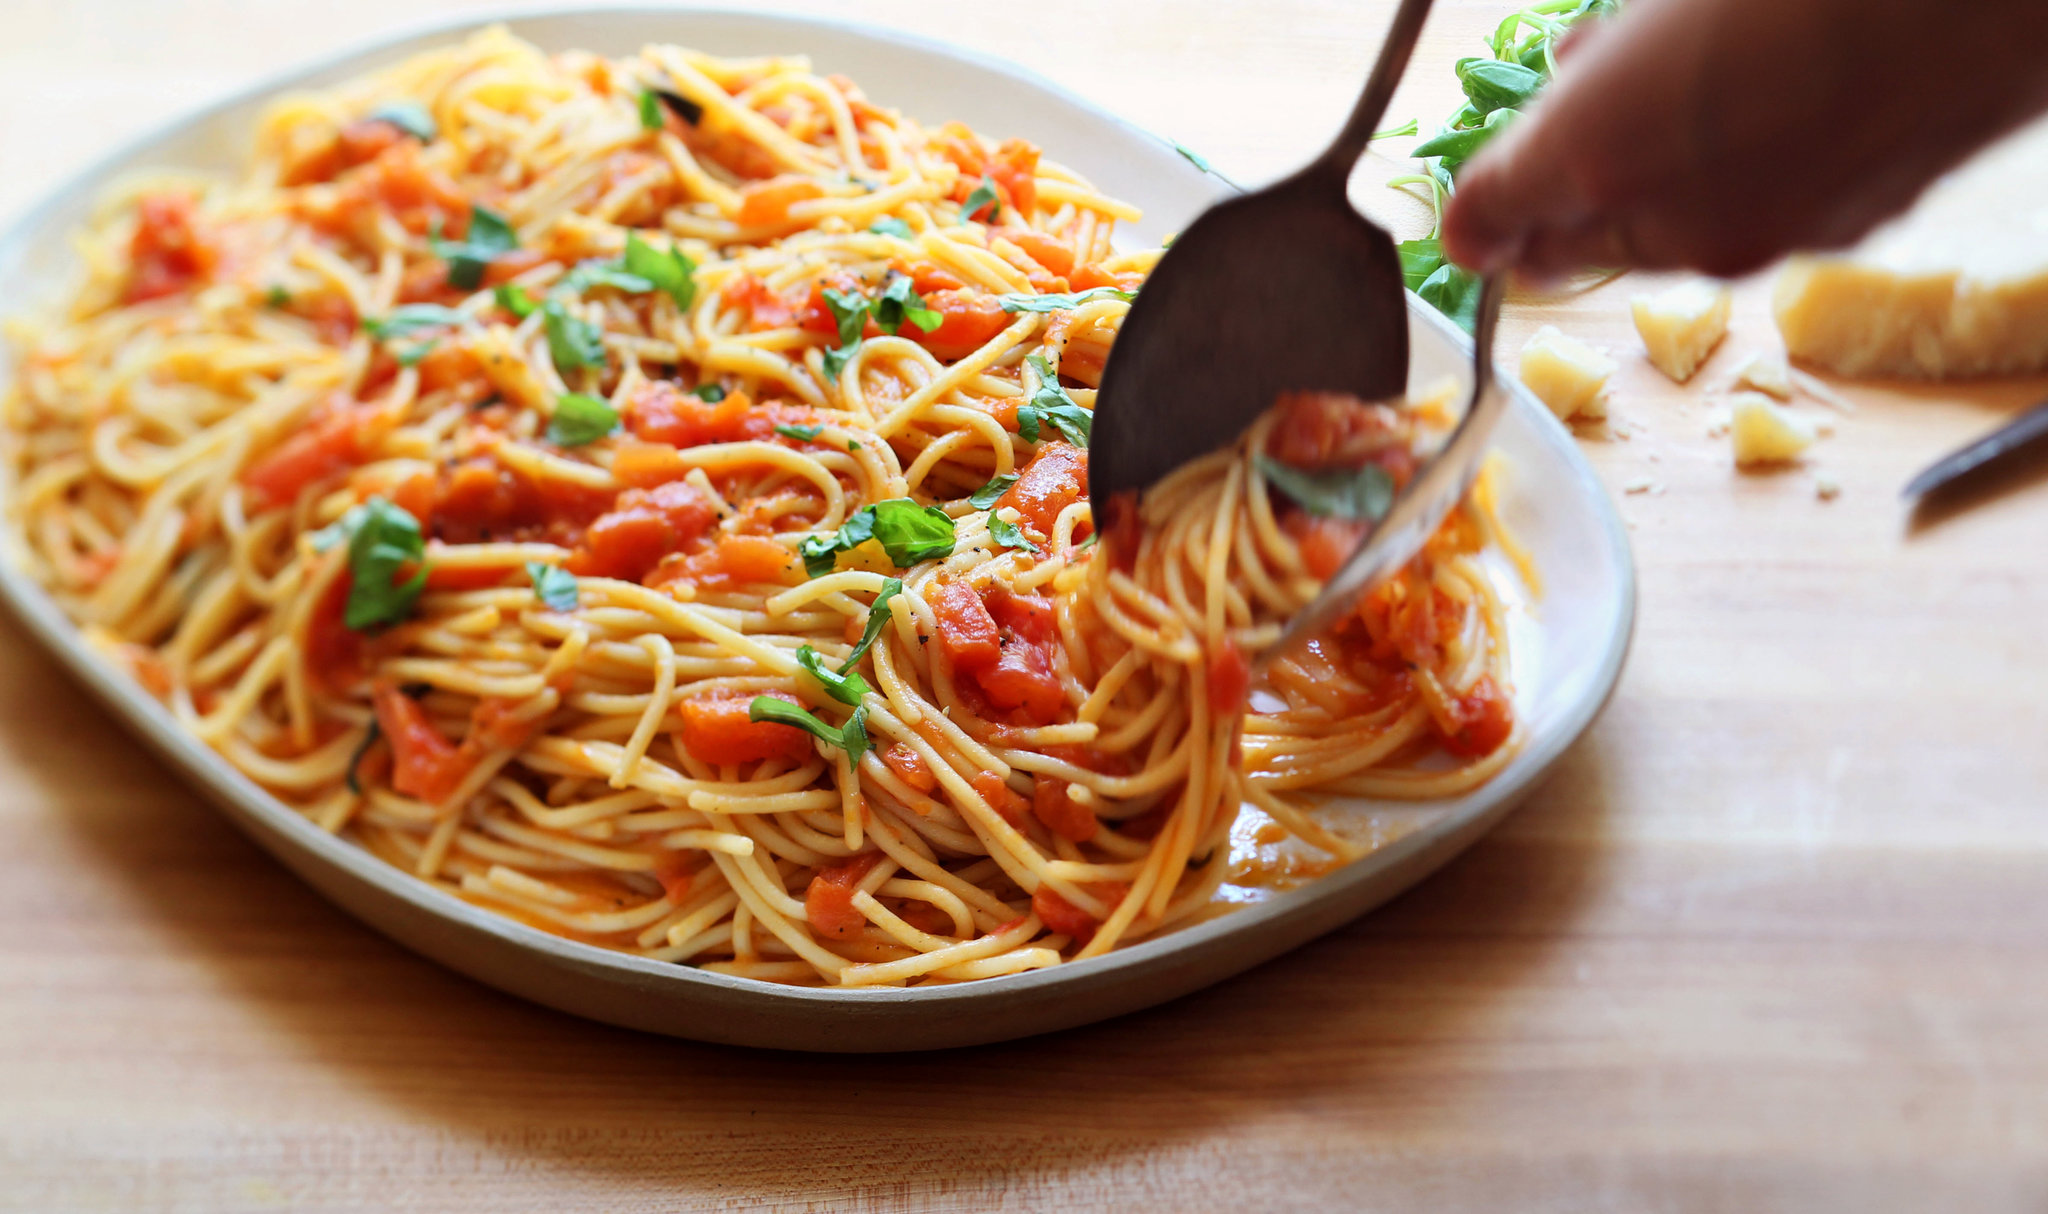

In [4]:
img

In [4]:
run_inference_on_image("spaghetti_demo.jpg")

spaghetti carbonara (score = 0.70469)
spaghetti bolognese (score = 0.08379)
macaroni and cheese (score = 0.06243)
ramen (score = 0.03799)
pad thai (score = 0.02269)


('spaghetti carbonara', array([28, 80, 96, 20,  8]))

In [5]:
run_inference_on_image("pad_thai_demo.jpg")

pad thai (score = 0.58233)
spaghetti bolognese (score = 0.07521)
fried calamari (score = 0.07349)
poutine (score = 0.02191)
club sandwich (score = 0.01541)


('pad thai', array([ 8, 80, 48, 19, 32]))

In [11]:
img = Image.open('hamburger.jpeg')

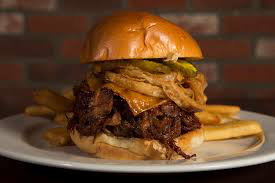

In [12]:
img

In [7]:
run_inference_on_image("hamburger.jpeg")

hamburger (score = 0.64173)
pulled pork sandwich (score = 0.24950)
club sandwich (score = 0.01219)
steak (score = 0.00865)
grilled cheese sandwich (score = 0.00543)


'hamburger'

In [13]:
run_inference_on_image("curry.jpeg")

paella (score = 0.18309)
chicken curry (score = 0.17365)
miso soup (score = 0.16434)
bibimbap (score = 0.13515)
ramen (score = 0.10356)


'paella'

In [14]:
run_inference_on_image("curry2.jpeg")

fried rice (score = 0.10916)
paella (score = 0.07350)
nachos (score = 0.06750)
risotto (score = 0.05198)
macaroni and cheese (score = 0.05184)


'fried rice'

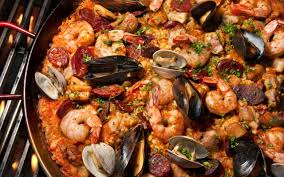

In [32]:
displayimage("paella1.jpeg")

In [6]:
#displayimage("paella1.jpeg")
run_inference_on_image("paella1.jpeg")

paella (score = 0.37483)
escargots (score = 0.08647)
gnocchi (score = 0.03783)
chicken wings (score = 0.03422)
bibimbap (score = 0.02927)


('paella', array([25, 37, 33, 91, 21]))

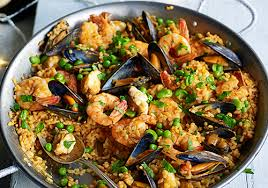

In [29]:
displayimage("paella2.jpeg")

In [30]:
run_inference_on_image("paella2.jpeg")

paella (score = 0.72958)
gnocchi (score = 0.03370)
escargots (score = 0.03346)
chicken curry (score = 0.02711)
shrimp and grits (score = 0.02080)


'paella'

In [23]:
import os

In [24]:
directory="/Users/Admin/Downloads/food-101/images"
lists=os.listdir(directory)

In [25]:
lists

['.DS_Store',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisq

In [26]:
os.path.isdir("/Users/Admin/Downloads/food-101/images/{}".format(lists[1]))

True

In [27]:
files = os.listdir("/Users/Admin/Downloads/food-101/images/{}".format(lists[1]))
for file in files:
    print file

1005649.jpg
1011328.jpg
101251.jpg
1014775.jpg
1026328.jpg
1028787.jpg
1034399.jpg
103801.jpg
1038694.jpg
1043283.jpg
1047447.jpg
1050519.jpg
1057749.jpg
1057810.jpg
1068632.jpg
1072416.jpg
1074856.jpg
1074942.jpg
1076891.jpg
1077610.jpg
1077964.jpg
1088809.jpg
1097378.jpg
110043.jpg
1103795.jpg
1106961.jpg
1109597.jpg
1111062.jpg
1112300.jpg
1112838.jpg
1113017.jpg
1121884.jpg
112378.jpg
1133267.jpg
1142597.jpg
1147371.jpg
1154371.jpg
1158360.jpg
1159801.jpg
1165004.jpg
1166116.jpg
1166210.jpg
116697.jpg
116705.jpg
1167170.jpg
1174241.jpg
1174330.jpg
1174949.jpg
1177254.jpg
1180600.jpg
118237.jpg
1184568.jpg
1185445.jpg
1185654.jpg
1191665.jpg
1196628.jpg
1199851.jpg
1200079.jpg
1214326.jpg
1215650.jpg
1218767.jpg
1220194.jpg
1230465.jpg
1232311.jpg
1235282.jpg
123782.jpg
1239205.jpg
1240585.jpg
1246460.jpg
1246552.jpg
1252879.jpg
1264435.jpg
1265307.jpg
1269202.jpg
1272778.jpg
1272958.jpg
127721.jpg
1280767.jpg
128259.jpg
1284428.jpg
1284682.jpg
1289014.jpg
1290425.jpg
1295996.jpg
12

In [37]:
categoryaccuracy=[]
for i in range(1,len(lists)):
    accuracybuffer={'name':lists[i],'top1':0,'top5':0}
    files = os.listdir("/Users/Admin/Downloads/food-101/images/{}".format(lists[1]))
    j=0
    for imagefile in files:
        if j<100:
            top1,top5=classifyimage("/Users/Admin/Downloads/food-101/images/{}/{}".format(lists[1],imagefile))
            index=label2id[lists[i].replace('_'," ")]
            if top1 == index:
                accuracybuffer['top1']+=1
            if index in set(top5):
                accuracybuffer['top5']+=1
        j+=1
    accuracybuffer['top1']=accuracybuffer['top1']/100.0
    accuracybuffer['top5']=accuracybuffer['top5']/100.0
    categoryaccuracy.append(accuracybuffer)
    #print "finished {}".format(lists[i])
    print accuracybuffer
    

{'top5': 0.65, 'name': 'apple_pie', 'top1': 0.0}
{'top5': 0.02, 'name': 'baby_back_ribs', 'top1': 0.0}
{'top5': 0.3, 'name': 'baklava', 'top1': 0.0}
{'top5': 0.0, 'name': 'beef_carpaccio', 'top1': 0.0}
{'top5': 0.01, 'name': 'beef_tartare', 'top1': 0.0}
{'top5': 0.01, 'name': 'beet_salad', 'top1': 0.0}
{'top5': 0.04, 'name': 'beignets', 'top1': 0.0}
{'top5': 0.01, 'name': 'bibimbap', 'top1': 0.0}
{'top5': 0.24, 'name': 'bread_pudding', 'top1': 0.0}
{'top5': 0.05, 'name': 'breakfast_burrito', 'top1': 0.0}
{'top5': 0.0, 'name': 'bruschetta', 'top1': 0.0}
{'top5': 0.0, 'name': 'caesar_salad', 'top1': 0.0}
{'top5': 0.09, 'name': 'cannoli', 'top1': 0.0}
{'top5': 0.0, 'name': 'caprese_salad', 'top1': 0.0}
{'top5': 0.04, 'name': 'carrot_cake', 'top1': 0.0}
{'top5': 0.0, 'name': 'ceviche', 'top1': 0.0}
{'top5': 0.0, 'name': 'cheese_plate', 'top1': 0.0}
{'top5': 0.07, 'name': 'cheesecake', 'top1': 0.0}
{'top5': 0.02, 'name': 'chicken_curry', 'top1': 0.0}
{'top5': 0.05, 'name': 'chicken_quesadil

KeyboardInterrupt: 

In [35]:
for objectbuff in categoryaccuracy:
    print objectbuff

{'top5': 65, 'name': 'apple_pie', 'top1': 0.65}
{'top5': 2, 'name': 'baby_back_ribs', 'top1': 0.02}
{'top5': 30, 'name': 'baklava', 'top1': 0.3}
{'top5': 0, 'name': 'beef_carpaccio', 'top1': 0.0}
{'top5': 1, 'name': 'beef_tartare', 'top1': 0.01}
{'top5': 1, 'name': 'beet_salad', 'top1': 0.01}
{'top5': 4, 'name': 'beignets', 'top1': 0.04}
{'top5': 1, 'name': 'bibimbap', 'top1': 0.01}
{'top5': 24, 'name': 'bread_pudding', 'top1': 0.24}
{'top5': 5, 'name': 'breakfast_burrito', 'top1': 0.05}
{'top5': 0, 'name': 'bruschetta', 'top1': 0.0}
{'top5': 0, 'name': 'caesar_salad', 'top1': 0.0}
{'top5': 9, 'name': 'cannoli', 'top1': 0.09}
{'top5': 0, 'name': 'caprese_salad', 'top1': 0.0}
{'top5': 4, 'name': 'carrot_cake', 'top1': 0.04}
{'top5': 0, 'name': 'ceviche', 'top1': 0.0}
{'top5': 0, 'name': 'cheese_plate', 'top1': 0.0}
{'top5': 7, 'name': 'cheesecake', 'top1': 0.07}
{'top5': 2, 'name': 'chicken_curry', 'top1': 0.02}
{'top5': 5, 'name': 'chicken_quesadilla', 'top1': 0.05}
{'top5': 0, 'name':

In [36]:
print accuracybuffer

{'top5': 12, 'name': 'waffles', 'top1': 0.12}
